# Demonstration of the Reimannian Manifold Hamiltonian Monte Carlo package (RMHMC)
This package use `jax` from google. You need to install it first to be able to run this notebook. Follow the instruction [Here](https://github.com/google/jax)

This Jupyter notebook demonstrate how to use the Rmhmc package.

First we import several packages.

In [2]:
import Rmhmc
import jax.numpy as np
import numpy as onp
import jax
import importlib
import matplotlib.pyplot as plt
import scipy.fftpack as FFT
import seaborn as sns
sns.set_style()

We need to add this if the Rmhmc.py is modified

In [22]:
importlib.reload(Rmhmc)

<module 'Rmhmc' from '/home/muhammad/GitHub/Reimmanian-Manifold-HMC/Rmhmc.py'>

Now the first thing is to define a target density, and choose among many choice of the metric. Here we will use the softabs metric of Betancourt. Then we specify the $\epsilon$ and $l$ constant for the Leapfrog integrator. After that we can create directly the RMHMC object by creating the instance from RMHMC class, with the initial position $x_{0}$ and momentum $p_{0}$.

In [29]:
target = Rmhmc.Target(Rmhmc.funnel_neglog,2,metric_fun=Rmhmc.softabs)
x_init = np.array([0.,0.])
p_init = np.array([0.,0.])
hmc = Rmhmc.RMHMC(100,target,x_init,p_init)
hmc.l=100

We can change some of the parameter, like the number of samples later on. To run the simulation just invoke
```python
hmc.run()
```

In [30]:
# target.metric_fun = Rmhmc.softabs
target.softabs_const = 1e0
hmc.nsamples = 1000
%time hmc.run()
print('is there any nan here? {}'.format(onp.any(onp.isnan(hmc.samples))))

CPU times: user 13.4 s, sys: 1.66 s, total: 15.1 s
Wall time: 9.92 s
is there any nan here? False


Then we can plot the samples it collects.

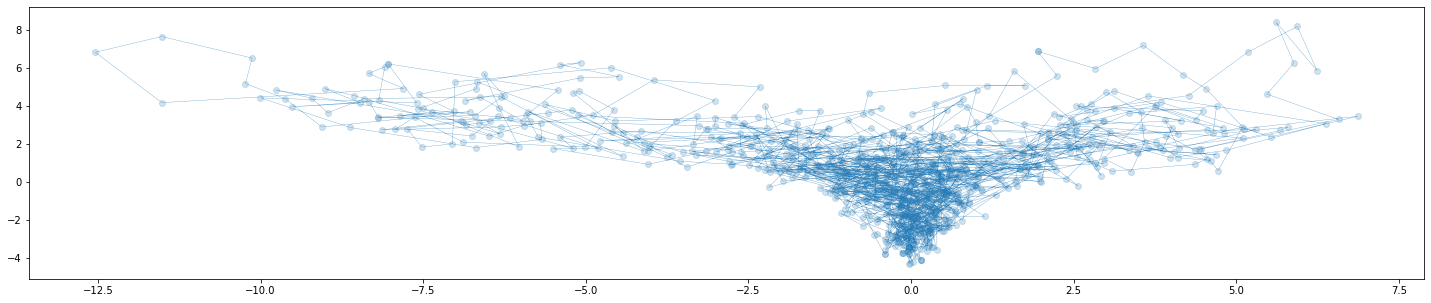

In [31]:
plt.figure(figsize=(25,5))
plt.plot(hmc.samples[:,0],hmc.samples[:,1],alpha=0.8,linewidth=0.3)
plt.scatter(hmc.samples[:,0],hmc.samples[:,1],alpha=0.2)

We could also plot the Autocorrelation function as below

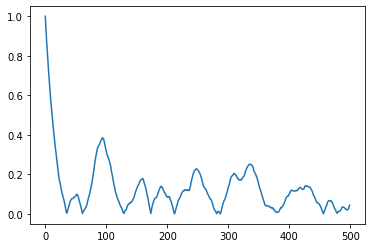

In [32]:
xp = hmc.samples[:,0] - onp.mean(hmc.samples[:,0])
n = xp.shape[0]
xp = onp.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
f = FFT.fft(xp)
p = onp.absolute(f)**2
pi = FFT.ifft(p)
ac = onp.real(pi)[:n//2]/pi[0].real#/(onp.arange(n//2)[::-1]+n//2)
plt.plot(onp.abs(ac))

/home/muhammad/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


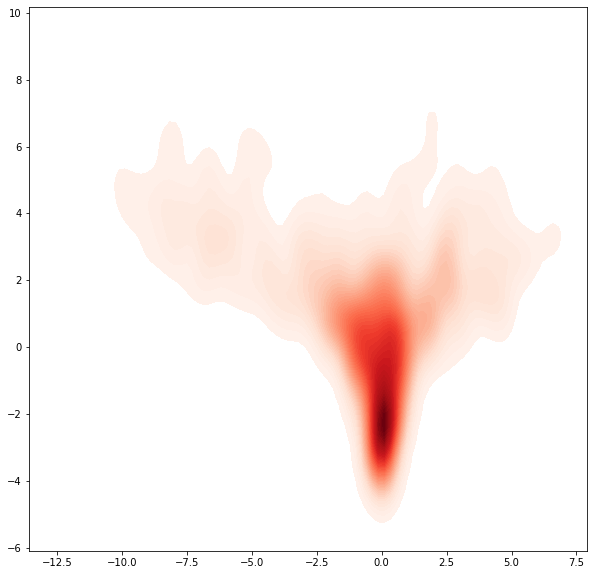

In [33]:
plt.figure(figsize=(10,10))
sns.kdeplot(hmc.samples,n_levels=60,cmap="Reds", shade=True, shade_lowest=False)

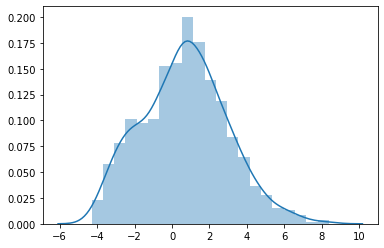

In [34]:
sns.distplot(hmc.samples[:,1])

In [25]:
ham = Rmhmc.Hamiltonian(target,x_init,p_init)
lFrog = Rmhmc.Leapfrog(epsilon,l,omega,target,ham,track=True)

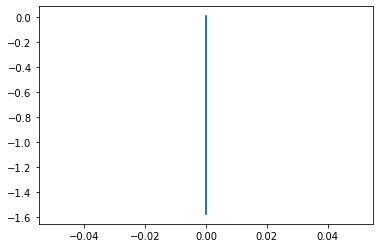

In [27]:
x,p,track = lFrog.leap()
plt.plot(track[:,0],track[:,1])

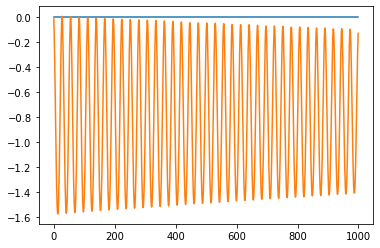